# <font color='red'>CS205 AI Project 2 - Feature Selection with Nearest Neighbor</font>
### <font color='red'>Student: Prakash Perimbeti</font>
### <font color='red'>Student Id: 862545992</font>

In [150]:
import math
import sys
import pandas as pd
import random
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [157]:
def load_csv_data(filename, label_column="Engine Condition", max_rows=2048):
    df = pd.read_csv(filename)

    # Drop non-numeric columns
    df = df.select_dtypes(include=["number"])

    # Shuffle and limit rows
    df = df.sample(frac=1, random_state=42).head(max_rows)

    labels = df[label_column].astype(int).tolist()
    features = df.drop(columns=[label_column])

    # Normalize features
    scaler = MinMaxScaler()
    normalized = scaler.fit_transform(features)

    data = list(zip(labels, normalized.tolist()))
    return data
    
def load_txt_data(filename):
    data = []
    with open(filename) as f:
        for line in f:
            if line.strip():
                parts = list(map(float, line.strip().split()))
                label, features = int(parts[0]), parts[1:]
                data.append((label, features))
    return data

def leave_one_out(data, features):
    correct = 0
    for i in range(len(data)):
        test = data[i]
        best_dist = float('inf')
        best_label = None
        for j in range(len(data)):
            if i == j:
                continue
            dist = sum((test[1][f] - data[j][1][f])**2 for f in features)
            if dist < best_dist:
                best_dist = dist
                best_label = data[j][0]
        if best_label == test[0]:
            correct += 1
    return correct / len(data) * 100

def forward_selection(data):
    print("Beginning search:")
    num_features = len(data[0][1])
    current = []
    best_overall = 0
    accuracies = []
    feature_order = []

    for i in range(num_features):
        best_feature = None
        best_accuracy = 0
        for f in range(num_features):
            if f in current:
                continue
            trial = current + [f]
            acc = leave_one_out(data, trial)
            if(num_features < 15):
                print(f"Using feature(s) {[x+1 for x in trial]} accuracy is {acc:.1f}%")
            if acc > best_accuracy:
                best_accuracy = acc
                best_feature = f

        if best_feature is not None:
            current.append(best_feature)
            best_overall = best_accuracy
            accuracies.append(best_accuracy)
            feature_order.append(best_feature + 1)  # using 1-based indexing
            print(f"Feature set {[x+1 for x in current]} was best with accuracy {best_accuracy:.1f}%")
        else:
            break

    print("Finished search.")
    return feature_order, accuracies


def backward_elimination(data):
    print("Beginning search:")
    num_features = len(data[0][1])
    current = list(range(num_features))
    
    feature_order = []
    accuracies = []
    
    best_overall = leave_one_out(data, current)
    accuracies.append(best_overall)
    feature_order.append(None)  # No feature removed in full set

    print(f"Using feature(s) {[x+1 for x in current]} accuracy is {best_overall:.1f}%")

    for i in range(num_features - 1):
        best_set = None
        best_accuracy = 0
        feature_removed = None
        
        for f in current:
            trial = deepcopy(current)
            trial.remove(f)
            acc = leave_one_out(data, trial)
            if(num_features < 15):
                print(f"Using feature(s) {[x+1 for x in trial]} accuracy is {acc:.1f}%")
            if acc > best_accuracy:
                best_accuracy = acc
                best_set = trial
                feature_removed = f
        
        if best_set is not None and best_accuracy > best_overall:
            current = best_set
            feature_order.append(feature_removed)
            accuracies.append(best_accuracy)
            best_overall = best_accuracy
            print(f"Feature set {[x+1 for x in current]} was best with accuracy {best_accuracy:.1f}%")
        else:
            break
    
    print("Finished search.")
    return feature_order[1:], accuracies[1:]  # Skip the "None" full-set entry


def plot_feature_selection_progress(feature_order, accuracies, feature_names=None):
    print(f"[DEBUG] feature_order: {feature_order}")
    print(f"[DEBUG] accuracies: {accuracies}")

    if len(feature_order) != len(accuracies):
        raise ValueError(
            f"Mismatch: feature_order has {len(feature_order)} items, "
            f"but accuracies has {len(accuracies)} items."
        )

    x_ticks = list(range(1, len(accuracies) + 1))

    # Generate readable x-axis labels
    if feature_names:
        try:
            x_labels = [feature_names[i] for i in feature_order]
        except IndexError as e:
            raise IndexError("Feature index in feature_order exceeds feature_names length.") from e
    else:
        x_labels = [f + 1 for f in feature_order]  # 1-based index for display

    print(f"[DEBUG] x_labels: {x_labels}")

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x_ticks, accuracies, marker='o')
    plt.xticks(ticks=x_ticks, labels=x_labels, rotation=45)
    plt.xlabel("Feature Added/Removed")
    plt.ylabel("Accuracy (%)")
    plt.title("Feature Selection: Accuracy Progression")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Beginning search:
Using feature(s) [1] accuracy is 65.4%
Using feature(s) [2] accuracy is 68.2%
Using feature(s) [3] accuracy is 72.4%
Using feature(s) [4] accuracy is 85.8%
Using feature(s) [5] accuracy is 68.6%
Using feature(s) [6] accuracy is 68.8%
Using feature(s) [7] accuracy is 71.4%
Using feature(s) [8] accuracy is 67.2%
Using feature(s) [9] accuracy is 73.8%
Using feature(s) [10] accuracy is 69.0%
Using feature(s) [11] accuracy is 67.8%
Using feature(s) [12] accuracy is 74.0%
Feature set [4] was best with accuracy 85.8%
Using feature(s) [4, 1] accuracy is 83.6%
Using feature(s) [4, 2] accuracy is 84.0%
Using feature(s) [4, 3] accuracy is 86.2%
Using feature(s) [4, 5] accuracy is 83.2%
Using feature(s) [4, 6] accuracy is 83.6%
Using feature(s) [4, 7] accuracy is 84.6%
Using feature(s) [4, 8] accuracy is 82.4%
Using feature(s) [4, 9] accuracy is 82.2%
Using feature(s) [4, 10] accuracy is 81.2%
Using feature(s) [4, 11] accuracy is 83.2%
Using feature(s) [4, 12] accuracy is 95.4%
F

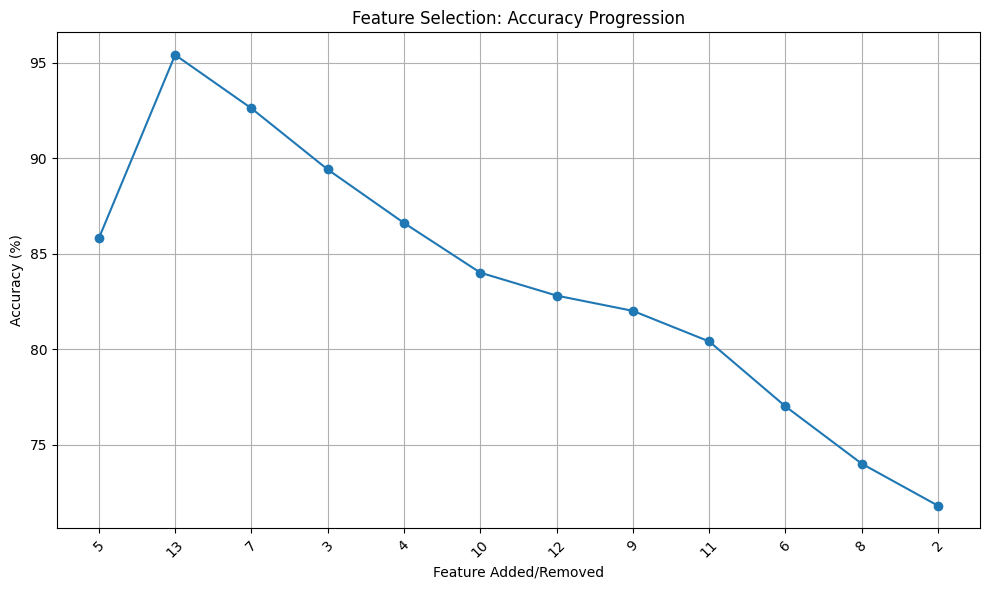

In [158]:
filename = './AI_PROJECT/CS205_small_Data__5.txt'
data = load_txt_data(filename)
feature_order, accuracies = forward_selection(data)
plot_feature_selection_progress(feature_order, accuracies)

Beginning search:
Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] accuracy is 71.8%
Using feature(s) [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] accuracy is 74.0%
Using feature(s) [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] accuracy is 73.4%
Using feature(s) [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12] accuracy is 73.4%
Using feature(s) [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12] accuracy is 69.6%
Using feature(s) [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12] accuracy is 71.4%
Using feature(s) [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12] accuracy is 73.6%
Using feature(s) [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12] accuracy is 72.4%
Using feature(s) [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12] accuracy is 70.4%
Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12] accuracy is 75.0%
Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12] accuracy is 69.2%
Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12] accuracy is 74.8%
Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] accuracy is 70.4%
Feature set [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 1

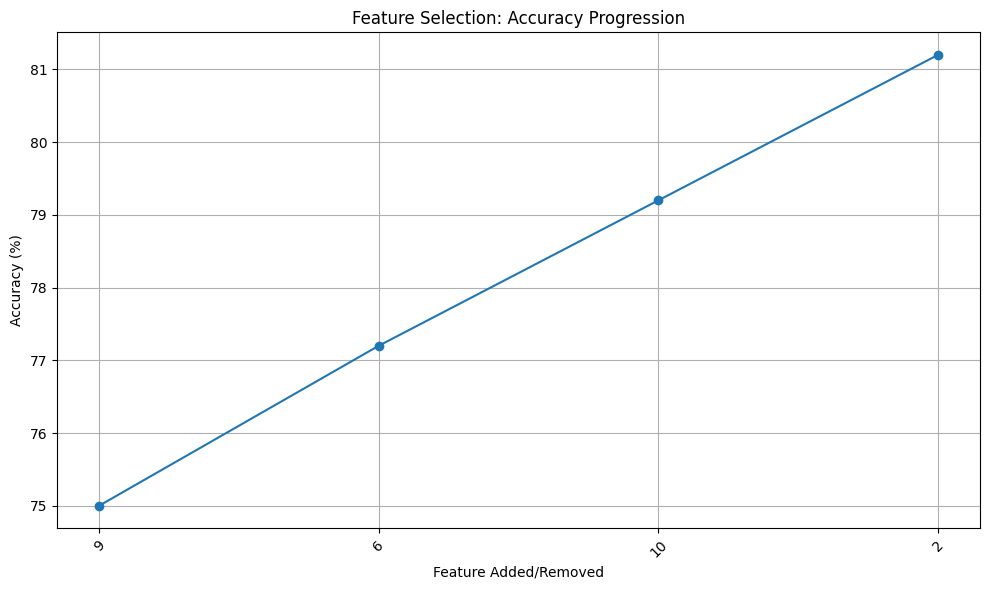

In [159]:
filename = './AI_PROJECT/CS205_small_Data__5.txt'
data = load_txt_data(filename)
feature_order, accuracies = backward_elimination(data)
plot_feature_selection_progress(feature_order, accuracies)


Beginning search:
Feature set [19] was best with accuracy 85.0%
Feature set [19, 22] was best with accuracy 96.5%
Feature set [19, 22, 12] was best with accuracy 94.9%
Feature set [19, 22, 12, 39] was best with accuracy 91.8%
Feature set [19, 22, 12, 39, 32] was best with accuracy 88.3%
Feature set [19, 22, 12, 39, 32, 42] was best with accuracy 86.8%
Feature set [19, 22, 12, 39, 32, 42, 46] was best with accuracy 84.3%
Feature set [19, 22, 12, 39, 32, 42, 46, 26] was best with accuracy 83.2%
Feature set [19, 22, 12, 39, 32, 42, 46, 26, 2] was best with accuracy 82.8%
Feature set [19, 22, 12, 39, 32, 42, 46, 26, 2, 24] was best with accuracy 81.0%
Feature set [19, 22, 12, 39, 32, 42, 46, 26, 2, 24, 35] was best with accuracy 80.0%
Feature set [19, 22, 12, 39, 32, 42, 46, 26, 2, 24, 35, 41] was best with accuracy 79.7%
Feature set [19, 22, 12, 39, 32, 42, 46, 26, 2, 24, 35, 41, 49] was best with accuracy 78.7%
Feature set [19, 22, 12, 39, 32, 42, 46, 26, 2, 24, 35, 41, 49, 27] was best 

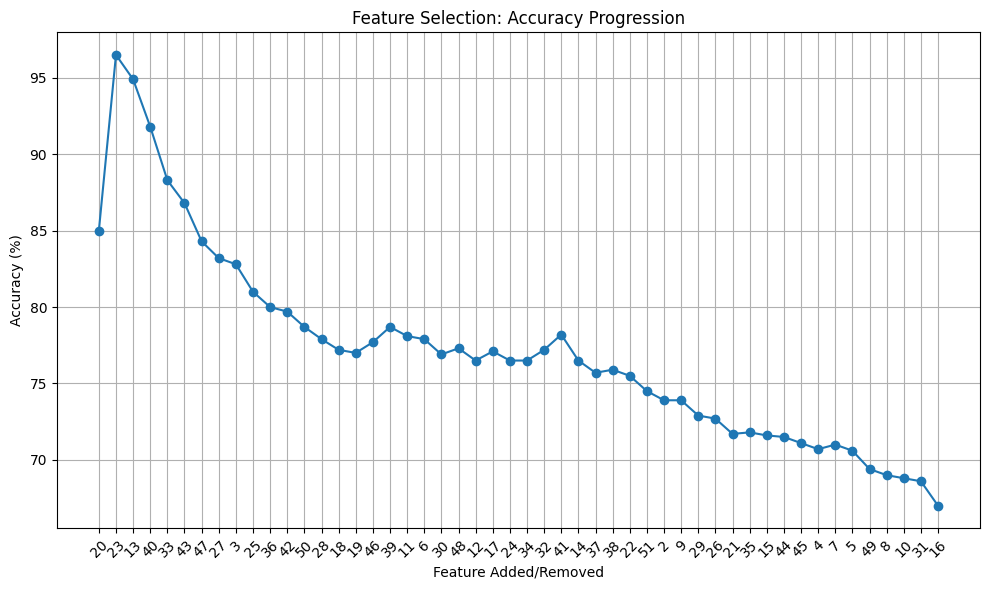

In [160]:
filename = './AI_PROJECT/CS205_large_Data__13.txt'
data = load_txt_data(filename)
feature_order, accuracies = forward_selection(data)
plot_feature_selection_progress(feature_order, accuracies)

Beginning search:
Using feature(s) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50] accuracy is 67.0%
Feature set [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50] was best with accuracy 68.6%
Feature set [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50] was best with accuracy 69.3%
Feature set [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49] was best with accuracy 70.0%
Feature set [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 

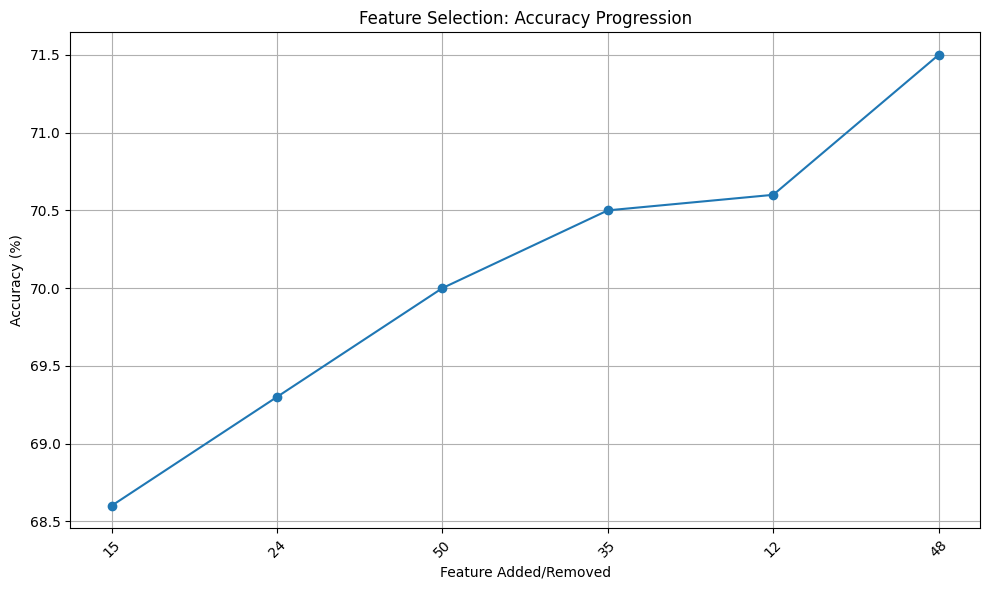

In [161]:
filename = './AI_PROJECT/CS205_large_Data__13.txt'
data = load_txt_data(filename)
feature_order, accuracies = backward_elimination(data)
plot_feature_selection_progress(feature_order, accuracies)

Beginning search:
Using feature(s) [1] accuracy is 55.3%
Using feature(s) [2] accuracy is 53.3%
Using feature(s) [3] accuracy is 51.9%
Using feature(s) [4] accuracy is 53.2%
Using feature(s) [5] accuracy is 54.5%
Using feature(s) [6] accuracy is 51.7%
Feature set [1] was best with accuracy 55.3%
Using feature(s) [1, 2] accuracy is 56.0%
Using feature(s) [1, 3] accuracy is 56.2%
Using feature(s) [1, 4] accuracy is 54.2%
Using feature(s) [1, 5] accuracy is 56.6%
Using feature(s) [1, 6] accuracy is 54.5%
Feature set [1, 5] was best with accuracy 56.6%
Using feature(s) [1, 5, 2] accuracy is 56.8%
Using feature(s) [1, 5, 3] accuracy is 56.0%
Using feature(s) [1, 5, 4] accuracy is 56.4%
Using feature(s) [1, 5, 6] accuracy is 56.4%
Feature set [1, 5, 2] was best with accuracy 56.8%
Using feature(s) [1, 5, 2, 3] accuracy is 56.9%
Using feature(s) [1, 5, 2, 4] accuracy is 56.6%
Using feature(s) [1, 5, 2, 6] accuracy is 57.7%
Feature set [1, 5, 2, 6] was best with accuracy 57.7%
Using feature(s)

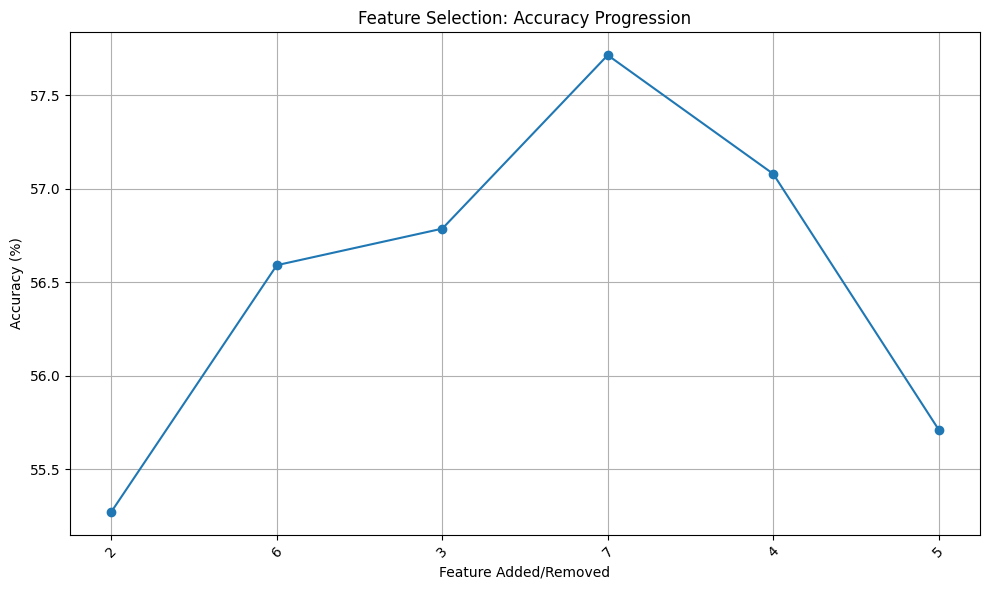

In [162]:
filename = './AI_PROJECT/engine_data.csv'
data = load_csv_data(filename)
feature_order, accuracies = forward_selection(data)
plot_feature_selection_progress(feature_order, accuracies)


Beginning search:
Using feature(s) [1, 2, 3, 4, 5, 6] accuracy is 55.7%
Using feature(s) [2, 3, 4, 5, 6] accuracy is 55.8%
Using feature(s) [1, 3, 4, 5, 6] accuracy is 55.5%
Using feature(s) [1, 2, 4, 5, 6] accuracy is 56.5%
Using feature(s) [1, 2, 3, 5, 6] accuracy is 57.1%
Using feature(s) [1, 2, 3, 4, 6] accuracy is 56.7%
Using feature(s) [1, 2, 3, 4, 5] accuracy is 55.7%
Feature set [1, 2, 3, 5, 6] was best with accuracy 57.1%
Using feature(s) [2, 3, 5, 6] accuracy is 55.8%
Using feature(s) [1, 3, 5, 6] accuracy is 57.8%
Using feature(s) [1, 2, 5, 6] accuracy is 57.7%
Using feature(s) [1, 2, 3, 6] accuracy is 57.1%
Using feature(s) [1, 2, 3, 5] accuracy is 56.9%
Feature set [1, 3, 5, 6] was best with accuracy 57.8%
Using feature(s) [3, 5, 6] accuracy is 52.9%
Using feature(s) [1, 5, 6] accuracy is 56.4%
Using feature(s) [1, 3, 6] accuracy is 58.7%
Using feature(s) [1, 3, 5] accuracy is 56.0%
Feature set [1, 3, 6] was best with accuracy 58.7%
Using feature(s) [3, 6] accuracy is 54.4

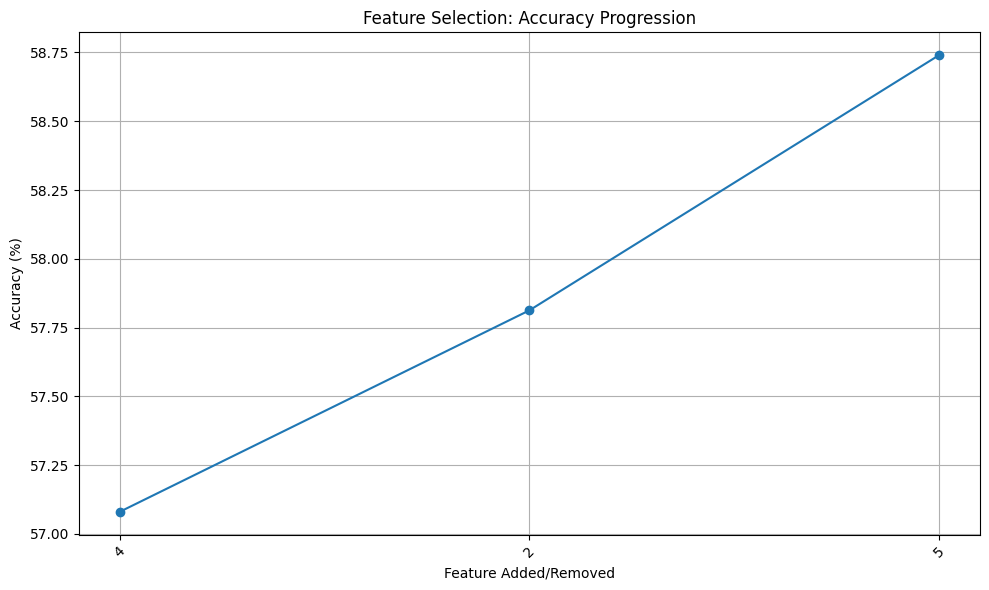

In [163]:
filename = './AI_PROJECT/engine_data.csv'
data = load_csv_data(filename)
feature_order, accuracies = backward_elimination(data)
plot_feature_selection_progress(feature_order, accuracies)


In [105]:
import os

def load_data(filename):
    ext = os.path.splitext(filename)[1].lower()
    if ext == ".txt":
        return load_txt_data(filename)
    elif ext == ".csv":
        return load_csv_data(filename)
    else:
        raise ValueError("Unsupported file format. Use .txt or .csv")
        

In [ ]:
if __name__ == "__main__":
    if len(sys.argv) < 3:
        print("Usage: python3 nn_feature_select.py <datafile> <forward|backward>")
        sys.exit(1)
        
    ext = os.path.splitext(sys.argv[1])[1].lower()
    if ext == ".txt":
        data = load_txt_data(filename)
    elif ext == ".csv":
        data = load_csv_data(filename)
    else:
        raise ValueError("Unsupported file format. Use .txt or .csv")
        
    if sys.argv[2] == "forward":
        feature_order, accuracies = forward_selection(data)
    elif sys.argv[2] == "backward":
        feature_order, accuracies = backward_elimination(data)
    else:
        print("Method must be 'forward' or 'backward'")
        
    plot_feature_selection_progress(feature_order, accuracies)

In [ ]:
if __name__ == "__main__":
    if len(sys.argv) < 3:
        print("Usage: python3 nn_feature_select.py <datafile> <forward|backward>")
        sys.exit(1)
    data = load_data(sys.argv[1])
    if sys.argv[2] == "forward":
        forward_selection(data)
    elif sys.argv[2] == "backward":
        feature_order, accuracies = backward_elimination(data)
    else:
        print("Method must be 'forward' or 'backward'")